# Perkenalan

Nama : Muhammad Afif Alvan

Batch : FTDS-016-rmt

Descriotion : Data ini berisikan informasi customer pada PT Telco yang disertakan data `churn`

Objective : Membuat model yang memprediksi customer `churn` dalam sebulan terakhir.

# Import Libraries

In [411]:
# Data loading
import pandas as pd
import numpy as np

# Data Visualisazation
import matplotlib.pyplot as plt
import seaborn as sns

# Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Modeling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model


# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Saving
import joblib
# load
from tensorflow.keras.models import load_model


# Data Loading

In [412]:
# Data Loading
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [413]:
# Display Head
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [414]:
# Display Tail
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [415]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Diketahui pada dataset kali ini memiliki `7043 data` dengan `21 kolom`. Dimana data terbagi menjadi beberapa type yaitu `Object, Integer dan Float`.
- Terdapat keunikan type data pada dataset dimana `TotalCharges` berbentuk `object` padahal valuenya berupa float. Sehingga pada kolom tersebut  akan diubah tipe datanya menjadi `float` menggunakan pandas.

In [416]:
# Retype TotalChargers

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [417]:
# Describe of Dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- Terlihat pada data describe bahwa rata-rata dari customer bukan seseorang yang lanjut usia dengan lamanya customer ini bertahan paling lama adalah `72 bulan` dan rata-rata customer disini sudah menjadi pelanggan telco selama `32 bulan`. Biaya bulanan yang diberikan telco kepada customer berbeda-beda namun masih dalam rentang tertinggi `118 dollar` tiap bulannya. 
Dan biaya total yang dibebankan kepada pelanggan berbanding lurus dengan `tenure dan monthlycharger`. Pada kolom `TotalChargers` hanya memiliki `7032` data yang mana teridentifikasi adanya missing value pada kolom ini dikarenakan total data yang seharunya adalah `7043`

# Explorotaroy Data Analys (EDA)

In [418]:
# Delete Customer ID
df = df.drop(columns = ['customerID'], axis =1)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- Dilakukan penghapusan kolom `customerID` karena menurut personal judment customerid tidak berpengaruh terhadap apapun dalam pembentukan model

## Data Description

## Missing Value

In [419]:
# Check missing value
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Seperti yang diduga pada data loading ternyata benar adanya bahwa kolom `TotalCharges` memiliki missing value sebanyak `11 data kosong`.

## Visualization

### Service

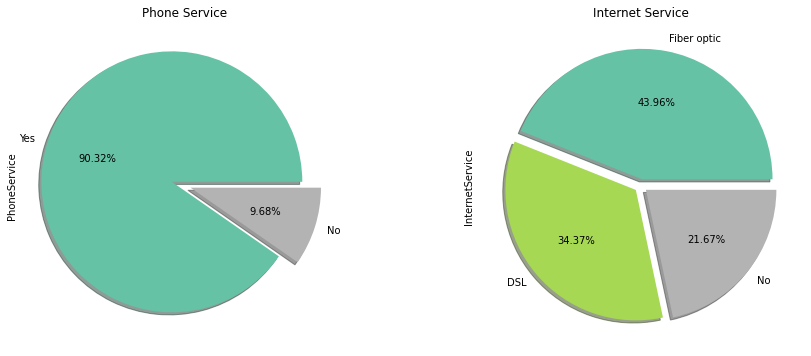

In [420]:
# Create Serviie Visualization
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Phone Service')
df['PhoneService'].value_counts().plot(kind='pie', autopct='%.2f%%',
                                       cmap='Set2', explode= [0.1,0.05],
                                       shadow = True)
plt.subplot(1,2,2)
plt.title('Internet Service')
df['InternetService'].value_counts().plot(kind='pie', autopct='%.2f%%',
                                       cmap='Set2', explode= [0.05,0.05,0.05],
                                       shadow = True)

- Dapat diketahui pada visualisasi data bahwa layanan phone sangat diminati banyak pelanggan. Terlihat pada visualisasi `90.32%` pelanggan adalah pengguna `phone service` dimungkinkan karena akses penggunaan yang mudah sehingga banyak yang menggunakan.
- Pada internet service, ternyata penggunakan `fiber optik` memiliki nilai `43.96%` pengguna dari keseluruhan data. kemudian `34.37%` mengguanakan `DSL`. Fiber optik memang bagus digunakan sehingga banyak pelanggan yang menggunakannya.

### Online

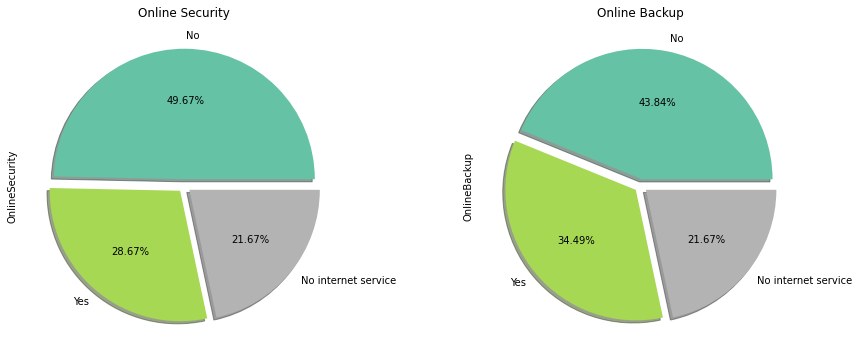

In [421]:
# Create a Pie Chart
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Online Security')
df['OnlineSecurity'].value_counts().plot(kind='pie', autopct='%.2f%%',
                                       cmap='Set2', explode= [0.05,0.05, 0.05],
                                       shadow = True)
plt.subplot(1,2,2)
plt.title('Online Backup')
df['OnlineBackup'].value_counts().plot(kind='pie', autopct='%.2f%%',
                                       cmap='Set2', explode= [0.05,0.05,0.05],
                                       shadow = True)

- Terdapat `49.67%` orang tidak menggunakan `online security` hal itu dikarenakan adanya faktor `online backup`. Dimana terlihat pengguna untuk layanan `online backup` lebih banyak yang menggunakan daripada yang tidak menggunakan.

### Device

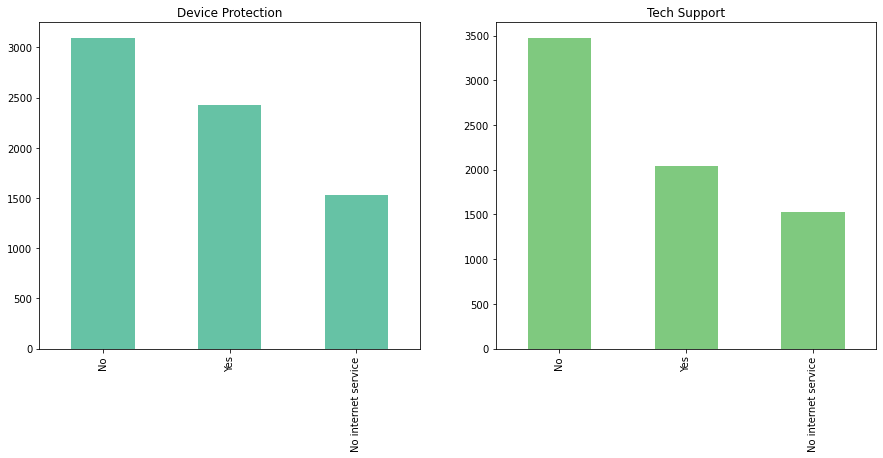

In [422]:
# creat visualisation device
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Device Protection')
df['DeviceProtection'].value_counts().plot(kind='bar', cmap ='Set2')
plt.subplot(1,2,2)

plt.title('Tech Support')
df['TechSupport'].value_counts().plot(kind='bar', cmap= 'Accent')

- Pelanggan yang memanfaatkan device protection dari telco ternyata tidak lebih banyak dari mereka yang tidak menggunakan layanan ini. Beberapa diantaranya karena tidak ada layanan internet.
- Pada technologi support juga lebih banyak yang tidak memilikinya. Sebagai dikarenakan tidak adanya layanan internet juga.

### Customer Identification

In [423]:
# Create years in tenure
tenure_gol = [0,12,24,32,44,56,68,80]
kat = ['1','2','3','4','5','6','7']
years = pd.cut(df['tenure'], bins =tenure_gol, labels=kat )

Text(0, 0.5, 'Total Charger (dollar)')

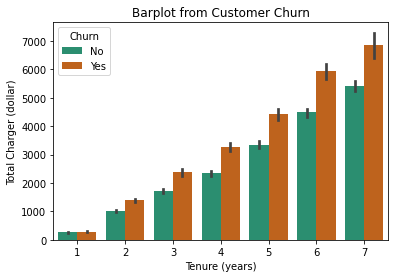

In [424]:
# barplot from customer
plt.title('Barplot from Customer Churn')
sns.barplot(x = years, y=df['TotalCharges'], hue= df['Churn'], data = df,palette='Dark2')
plt.xlabel('Tenure (years)')
plt.ylabel('Total Charger (dollar)')

**Analisis**

1. Pada visualisasi diatas terlihat bahwa semakin lama customer bertahan, total biaya yang diberikan juga semakin banyak.

2. Hal tersebut  juga mendorong customer untuk tidak berlangganan lagi.

3. Setiap tahunnya nilai dari customer yang berhenti berlangganan lebih banyak dari pada yang bertahan. 

### Churn

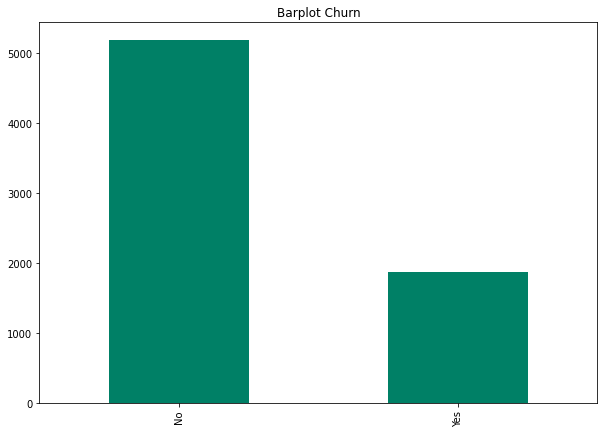

In [425]:
# create catplot
plt.figure(figsize=(10,7))
plt.title('Barplot Churn')
df['Churn'].value_counts().plot(kind='bar', colormap='summer')

- Terlihat pada visualisasi pelanggan yang `churn` lebih sedikit dari pada pelanggan yang bertahan.
- Pada visualisasi menggunakan barplot diketahui bahwa data target yaitu kolom `Churn` adalah data yang `imbalance` sehingga akan dilakukan handling untuk membuat data target ini `balance` untuk mencegah overfitting pada model.

### Streaming

In [426]:
#a = df['PhoneService'][df['PhoneService']== 'Yes'].count()
b = df['StreamingTV'][df['StreamingTV']=='Yes'].count()
c = df['StreamingMovies'][df['StreamingMovies']=='Yes'].count()

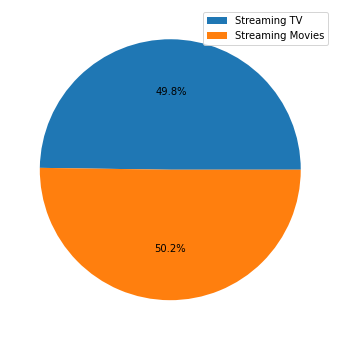

In [427]:
plt.figure(figsize=(15,6))
plt.pie([b,c], autopct='%.1f%%')
plt.legend(['Streaming TV', 'Streaming Movies']);

- Diketahui pada pie chart bahwa cutomer memiliki konsumsi berlangganan yang hampir sama dimana pelanggan yang menggunakan layanan streaming tv dan movie hanya memiliki perbedaan 0.2%

### Distribution Data

In [428]:
# build a func plot distribution
def distribution(df, x):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.title('Histogram ' + x)
    sns.histplot(df[x], color='lightblue', bins = 5)
    
    plt.subplot(1,2,2)
    plt.title('Boxplox ' + x)
    sns.boxplot(y = df[x], color= 'lightslategrey', )
    plt.show()
    
    print(f'Nilai Skewness ' + x,':', df[x].skew())

In [429]:
# create a columns list
feature =['SeniorCitizen', 'tenure','MonthlyCharges', 'TotalCharges']
feature

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

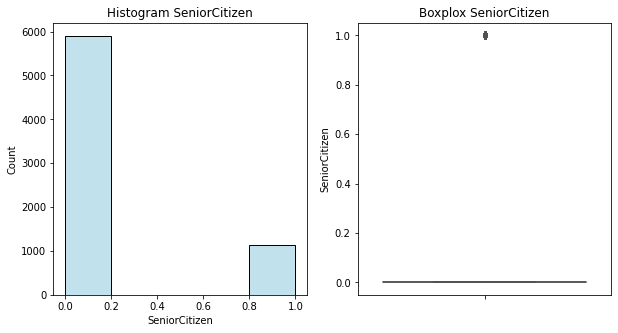

Nilai Skewness SeniorCitizen : 1.8336327440928564


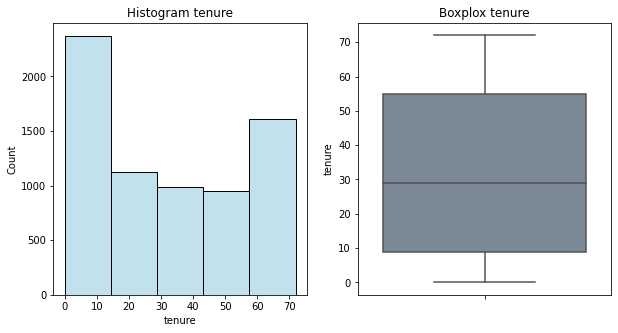

Nilai Skewness tenure : 0.2395397495619829


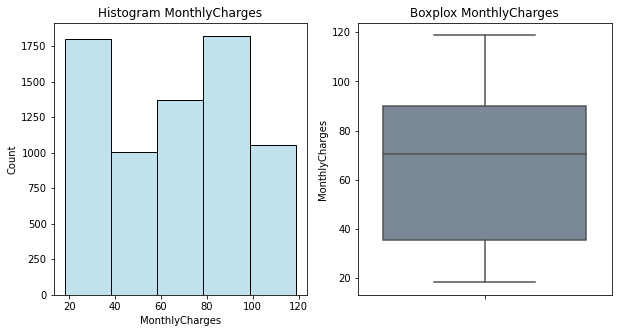

Nilai Skewness MonthlyCharges : -0.22052443394398033


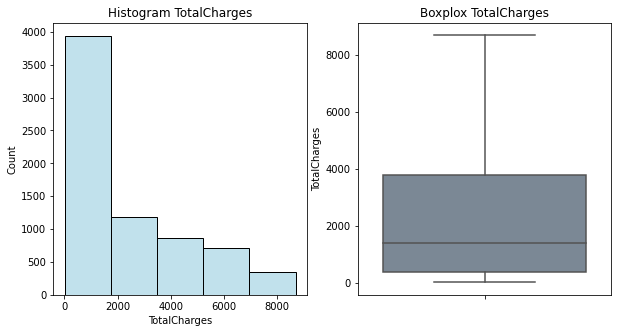

Nilai Skewness TotalCharges : 0.961642499724251


In [430]:
# Looping for vis 
for i in feature:
    distribution(df, i)

**Analisis**

1. `SeniorCitizen` dan `Total Charger` memiliki nilai skewness diatas `0,05` sehingga dikatakan berdistribusi tidak normal dengan `Right-Skewness`.
2. `tenure` dan `MonthlyCharges` memiliki nilai skewnes didalam rentang `0,05- -0,05` sehingga dapat dikatakan data tersebut berdistribusi normal.
3. Dari ke empat feature tidak ada yang memiliki `outlier`

# Data Preparation

## Data Cleaning

### Missing Value

In [431]:
# Handling NaN with median.
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

- Dilakukan Handling missing value pada Kolom `Total Charges` dikarenakan data tersebut berdistribusi tidak normal, Sehingga penanganan missing value dengan `median`

In [432]:
# check MisNa
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Outlier

Berdasar exploratory data analysis(EDA) diketahui bawha tidak ada data yang memiliki outlier. Sehingga tidak dilakukan penanganan outlier.

# Data Preprocessing

## Model Inference

In [433]:
# create data inference
df_inf = df.sample(20, random_state=11)
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6625,Female,1,No,No,12,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.30,1094.50,Yes
5975,Male,0,Yes,Yes,7,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,89.75,608.80,Yes
6891,Female,0,Yes,No,4,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.05,129.60,No
1681,Female,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.00,1849.20,No
4780,Male,0,No,No,9,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,70.05,657.50,No
3648,Female,0,Yes,Yes,51,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,Yes,Electronic check,90.15,4554.85,No
2517,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.50,69.50,Yes
2316,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.70,73.05,No
4295,Male,1,Yes,No,67,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),60.95,4119.40,No
1698,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Two year,Yes,Electronic check,84.80,6152.40,No


In [434]:
# splitting x and y
data_train_test = df.drop(df_inf.index)
data_train_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [435]:
# Reset index
data_train_test.reset_index(drop = True, inplace = True)
df_inf.reset_index(drop =True, inplace=True)
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,No,12,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.30,1094.50,Yes
1,Male,0,Yes,Yes,7,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,89.75,608.80,Yes
2,Female,0,Yes,No,4,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.05,129.60,No
3,Female,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.00,1849.20,No
4,Male,0,No,No,9,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,70.05,657.50,No
5,Female,0,Yes,Yes,51,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,Yes,Electronic check,90.15,4554.85,No
6,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.50,69.50,Yes
7,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.70,73.05,No
8,Male,1,Yes,No,67,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),60.95,4119.40,No
9,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Two year,Yes,Electronic check,84.80,6152.40,No


- Data inference adalah data yang tidak diketahui oleh model. Dimana data ini nantinya akan digunakan untuk diprediksi oleh model yang dibuat.

## Splitting

In [436]:
# Splitting feature and target
x = data_train_test.drop(['Churn'], axis =1)
y = data_train_test['Churn']

In [437]:
# splitting train and test
x_train_val, x_test, y_train_val, y_test = train_test_split(x,y, test_size=0.15, random_state=11)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.15, random_state=12)

print('Train Size', x_train.shape)
print('Test size: ', x_test.shape)
print('Val size: ', x_val.shape)


Train Size (5073, 19)
Test size:  (1054, 19)
Val size:  (896, 19)


- Disini saya membagi antara data train untuk pembuatan model dan data test untuk pengecekan model  dan data validation untuk memvalidasi data.

## Missing Value

In [438]:
# check misna train
x_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [439]:
# Check misna val
x_val.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [440]:
# Check misna test
x_test.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

- Pada pengecekan missing value, data x baik train, val dan test sudah tidak terdapat missing value, sehingga dapat dapat digunakan.

## Get Numerical and Categorical

In [441]:
# Create Num and Cat
num_columns = x_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = x_train.select_dtypes(include =['object']).columns.tolist()
print(f'Numerical Columns: ', num_columns, '\n')
print(f'Categorical: ', cat_columns)

Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'] 

Categorical:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


- Memisahkan data dari numerical dan categorical digunakan untuk proses scaling dan encoding. Dimana `numerical` akan di `scaling` dan `categorical` akan di encoding.

## Pipeline

In [442]:
# create pipeline
num_pipe = make_pipeline(MinMaxScaler())

cat_pipe = make_pipeline(OrdinalEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipe, num_columns),
    ('pipe_cat', cat_pipe, cat_columns)
])

In [443]:
# fit transform with pipeline 
x_train = final_pipeline.fit_transform(x_train)
x_val = final_pipeline.transform(x_val)
x_test = final_pipeline.transform(x_test)


x_train.shape

(5073, 19)

In [444]:
# create data frame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_val = pd.DataFrame(y_val)

In [445]:
# Encoding target and fit
encoder = OrdinalEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoder.fit(y_val)

OrdinalEncoder()

In [446]:
# Etransform encode target
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
y_val = encoder.transform(y_val)

In [447]:
# Create Dataframe Y
y_train = pd.DataFrame(y_train, columns= ['Churn']) 
y_test = pd.DataFrame(y_test, columns= ['Churn']) 
y_val = pd.DataFrame(y_val, columns= ['Churn']) 

In [448]:
# Create DataFrame X
x_train = pd.DataFrame(x_train, columns=[num_columns + cat_columns])
x_val = pd.DataFrame(x_val, columns=[num_columns + cat_columns])
x_test = pd.DataFrame(x_test, columns=[num_columns + cat_columns])
x_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,0.041667,0.013930,0.005726,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0
1,0.0,0.958333,0.877114,0.835844,0.0,1.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0
2,1.0,0.069444,0.558209,0.036516,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,0.0,0.097222,0.718408,0.066406,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0
4,0.0,0.055556,0.519900,0.031825,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068,0.0,0.680556,0.333831,0.291490,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0
5069,1.0,0.416667,0.610945,0.271140,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0
5070,0.0,0.013889,0.513930,0.005905,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
5071,1.0,0.055556,0.761194,0.046639,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0


- Disini telah dilakukan preprocessing pada dataset berupa `scaling dan Encoding`. Digunakan `Normalisasi` untuk scaling dengan `MinMaxScaler` dikarenakan data numeric tidak berdistribusi normal. Sedangkan untuk encoding digunakan `Ordinal Encoder` karena bertingkat dan memiliki kelasnya masing-masing.

## Feature Selection

In [449]:
# Creat x_train cat and num
x_train_num = x_train[num_columns]
x_train_cat = x_train[cat_columns]

### Chi-Square

In [450]:
# Chi-square
test = SelectKBest(score_func= chi2, k=4)
fit = test.fit(x_train_cat, y_train)
fit.scores_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([5.37000425e-01, 5.71488949e+01, 8.17042442e+01, 4.71766657e-02,
       6.48868232e+00, 7.67898034e+00, 4.19762976e+02, 1.65850323e+02,
       1.45394288e+02, 4.02898598e+02, 6.01162839e+00, 5.90385228e+00,
       8.40036838e+02, 6.15028599e+01, 4.37828568e+01])

In [451]:
np.round_(fit.scores_)

array([  1.,  57.,  82.,   0.,   6.,   8., 420., 166., 145., 403.,   6.,
         6., 840.,  62.,  44.])

In [452]:
# find score 
chi = pd.Series(fit.scores_)
chi.index = x_train_cat.columns
chi.sort_values(ascending = False)

Contract            840.036838
OnlineSecurity      419.762976
TechSupport         402.898598
OnlineBackup        165.850323
DeviceProtection    145.394288
Dependents           81.704244
PaperlessBilling     61.502860
Partner              57.148895
PaymentMethod        43.782857
InternetService       7.678980
MultipleLines         6.488682
StreamingTV           6.011628
StreamingMovies       5.903852
gender                0.537000
PhoneService          0.047177
dtype: float64

- Setelah dilakukan feature selection untuk data categorical menggunakan `chi-square` diperoleh empat feature yang memiliki korelasi tertinggi kepada target yaitu `Contract, OnlineSecurity, TechSupport,OnlineBackup`. Kemudian untuk sisanya tidak digunakan dalam pembuatan model

### Anova

In [453]:
# f_classif for anova
f_test = SelectKBest(score_func = f_classif, k =2)
fit = f_test.fit(x_train_num, y_train)
fit.scores_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([142.6207618 , 750.93466538, 202.6142691 , 213.45158172])

In [454]:
np.round_(fit.scores_)

array([143., 751., 203., 213.])

In [455]:
# Find score 
result = pd.Series(fit.scores_)
result.index = x_train_num.columns
result.sort_values(ascending=False)

tenure            750.934665
TotalCharges      213.451582
MonthlyCharges    202.614269
SeniorCitizen     142.620762
dtype: float64

- Diketahui setelah melakukan feature selection pada data numeric menggunakan `anova` didapatkan hasil bahwa `tenure dan TotalCharges` memiliki korelasi tertinggi kepada target. Sehingga yang lainnya tidak digunakan.

### Dropping Columns


In [456]:
# Dropping columns

x_train.drop(['MonthlyCharges', 'SeniorCitizen', 'DeviceProtection','Dependents',
              'PaperlessBilling','Partner','PaymentMethod','InternetService','MultipleLines',
              'StreamingTV', 'StreamingMovies','gender', 'PhoneService'], 
             axis = 1, inplace=True)

x_val.drop(['MonthlyCharges', 'SeniorCitizen', 'DeviceProtection','Dependents',
              'PaperlessBilling','Partner','PaymentMethod','InternetService','MultipleLines',
              'StreamingTV', 'StreamingMovies','gender', 'PhoneService'], 
             axis = 1, inplace=True)

x_test.drop(['MonthlyCharges', 'SeniorCitizen', 'DeviceProtection','Dependents',
              'PaperlessBilling','Partner','PaymentMethod','InternetService','MultipleLines',
              'StreamingTV', 'StreamingMovies','gender', 'PhoneService'], 
             axis = 1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [457]:
x_train

,tenure,TotalCharges,OnlineSecurity,OnlineBackup,TechSupport,Contract
0,0.041667,0.005726,1.0,1.0,1.0,0.0
1,0.958333,0.835844,2.0,2.0,2.0,1.0
2,0.069444,0.036516,0.0,0.0,0.0,0.0
3,0.097222,0.066406,0.0,0.0,0.0,0.0
4,0.055556,0.031825,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
5068,0.680556,0.291490,0.0,2.0,0.0,1.0
5069,0.416667,0.271140,0.0,2.0,0.0,0.0
5070,0.013889,0.005905,0.0,0.0,0.0,0.0
5071,0.055556,0.046639,0.0,0.0,0.0,0.0


## Balancing Data

In [458]:
# balancing data with SMOTE
smote = SMOTE(random_state = 32)
x_train, y_train = smote.fit_resample(x_train, y_train)
y_train.value_counts()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Churn
0.0      3711
1.0      3711
dtype: int64

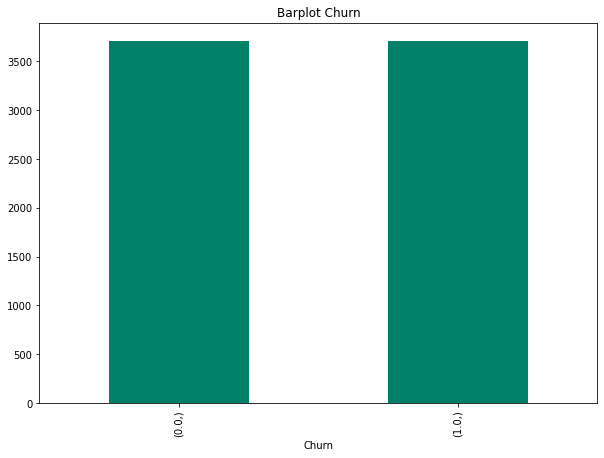

In [459]:
# create catplot
plt.figure(figsize=(10,7))
plt.title('Barplot Churn')
y_train.value_counts().plot(kind='bar', colormap='summer')

- Dikarenakan tujuan dari pembuatan model predict ini adalah untuk mengetahui pelanggan yang `churn` atau tidak, akan tetapi kelom `1` yang artinya pelanggan `churn` adalah minority dengan artian lebih banyak yang tidak `churn` sehingga dilakukan balancing data dengan teknik over-sampling `SMOTE`. Dimana meningkatkan kelas minority agar seimbang dengan minority.

# Sequential API

In [460]:
# PipeLine Tensorflow
train_pipe = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(500).repeat(3).shuffle(50)
val_pipe = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(100)
test_pipe = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(100)

- Menggunakan pipeline pada modeling data untuk mempermudah dan meperingkas codingan. 
- Pada pipeline train telah di tetapkan banyaknya batch adalah 500, dengan repeat atau pengulangan sebanyak 3 kali. Serta memberikan tempat transit data sebanyak 50.
- Pada Validasi dan test diberikan batch sebanyak 100.
- Dikarenakan data nya ribuan digunakan batch yang tinggi untuk sekali proses pelatihan model, sehingga running tidak terlalu lama

## Model Definition

In [461]:
# Create Sequential API
model_sequential = Sequential()
model_sequential.add(Dense(32, activation='relu', input_shape=(6,)))
model_sequential.add(Dense(18, activation='relu'))
model_sequential.add(Dense(9, activation='relu'))
model_sequential.add(Dense(1, activation='sigmoid'))

model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 32)                224       
                                                                 
 dense_73 (Dense)            (None, 18)                594       
                                                                 
 dense_74 (Dense)            (None, 9)                 171       
                                                                 
 dense_75 (Dense)            (None, 1)                 10        
                                                                 
Total params: 999
Trainable params: 999
Non-trainable params: 0
_________________________________________________________________


- Pada Model sequential baseline saya menggunakan 3 hidden layers dengan neuron pada mulai dari 32-9. Pada hidden layer ini menerima input sebanyak 6 feature yang nantinya akan diberikan kepada output untuk proses klasifikasi.
- Input memiliki 32 neuron dan outputnya 1 neuron yang mana satu neuron ini akan menghasilkan klasfikasi data.

- Untuk mengukur seberapa akurat model dalam proses training digunakan `binary_scrossentropy` yang mana mengukur perbedaan antara dua distribusi probabilitas untuk variabel acak. Dimana nilai paling baik adalah ketika loss mendekati 0

- Optimizer menggunakan 'Adam' Dimana optimizer ini akan memperbarui weight secara iteratif yang didasarkan pada training bolak baliknya model.

- metrics yang digunakan adalah accuracy dimana paling mudah dibaca, jika accuracy tinggi maka model sudah dikatakan baik

## Model Training

In [462]:
#Training Model
%%time
history_seq = model_sequential.fit(train_pipe, epochs=10,
                                   validation_data=val_pipe)

Epoch 1/10
45/45 [==============================] - 1s 5ms/step - loss: 0.6421 - accuracy: 0.6115 - val_loss: 0.5386 - val_accuracy: 0.7690
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.6878 - val_loss: 0.5421 - val_accuracy: 0.7299
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7427 - val_loss: 0.5229 - val_accuracy: 0.6931
Epoch 4/10
45/45 [==============================] - 0s 3ms/step - loss: 0.5412 - accuracy: 0.7454 - val_loss: 0.5249 - val_accuracy: 0.6920
Epoch 5/10
45/45 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7494 - val_loss: 0.5564 - val_accuracy: 0.6574
Epoch 6/10
45/45 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7409 - val_loss: 0.5140 - val_accuracy: 0.7154
Epoch 7/10
45/45 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7500 - val_loss: 0.5636 - val_accuracy: 0.6641
Epoch 8/10
45/45 [==

- Epoch yang digunakan untuk baseline tidak terlalu banyak, hanya 10 kali data melakukan training bolak balik. Dengan pipe line pada training dan validasi.
- Terlihat waktu yang dibutuhkan hanya `2.5 detik`. 
- Didapatkan nilai terakhir untuk loss adalah `0.5` dan accuracy sebesar `0.74`

## Model Evaluation

In [463]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.642140,0.611515,0.538606,0.768973
1,0.596122,0.687820,0.542105,0.729911
2,0.564796,0.742747,0.522888,0.693080
3,0.541226,0.745441,0.524870,0.691964
4,0.524689,0.749439,0.556352,0.657366
5,0.521924,0.740861,0.514047,0.715402
6,0.511083,0.750022,0.563561,0.664062
7,0.514928,0.736145,0.566775,0.668527
8,0.509122,0.746609,0.549139,0.710938
9,0.505733,0.748765,0.547200,0.713170


- Nilai tertinggi pada loss pada epoch 1 sebesar `0.6` dan accuracy terbaik selama 10 epoch ini adalah 0.74.
- Hasil terlihas buruk dikarenakan model hanya melakukan sedikit pelatihan sehingga belum mampu mengenali data.

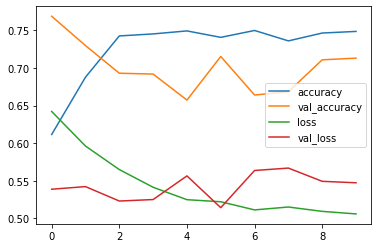

In [464]:
# plot acc and val loss
history_seq_df[['accuracy','val_accuracy', 'loss', 'val_loss']].plot()

- Disini terlihat bahwa accuracy memang semakin naik dari epoch 1 sampai 3. Namup setelahnya terjadi stuck nilai akurasi sampai ke epoch 10. Hal di diidentifikasi karena model merasa telah baik dalam memprediksi nilai.
- Untuk loss nya semakin banyak epoch nilainya akan semakin mendekati 0. Namun pada val loss terdapat kenaikan nilai loss pada epoch ke 5.

In [465]:
# Cslassification report 
y_pred_seq = model_sequential.predict(x_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

33/33 [==============================] - 0s 941us/step
              precision    recall  f1-score   support

         0.0       0.89      0.70      0.78       785
         1.0       0.46      0.76      0.58       269

    accuracy                           0.71      1054
   macro avg       0.68      0.73      0.68      1054
weighted avg       0.78      0.71      0.73      1054



- Dikarenakan nilai epoch yang sedikit model kurang mampu untuk memprediksi data dengan latihan yang kurang, sehingga hanya mendapatkan `67% accuracy`

# Functional API

## Model Definition

In [466]:
# Create Functional API
input_layer = Input(shape=(6,))
hidden1_layer = Dense(32, activation='relu')(input_layer)
hidden2_layer = Dense(18, activation = 'relu')(hidden1_layer)
hidden3_layer = Dense(9, activation ='relu')(hidden2_layer)

concat_layer = concatenate([input_layer, hidden3_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional_concat = Model(inputs= input_layer, outputs = output_layer)
model_functional_concat.compile(loss ='binary_crossentropy',
                                optimizer='Adam', metrics = ['accuracy'])

model_functional_concat.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_76 (Dense)               (None, 32)           224         ['input_8[0][0]']                
                                                                                                  
 dense_77 (Dense)               (None, 18)           594         ['dense_76[0][0]']               
                                                                                                  
 dense_78 (Dense)               (None, 9)            171         ['dense_77[0][0]']               
                                                                                            

- Disini terdapat hubungan antara hidden layer dengan output, Dimana pada outputnya adalah hasil dari hidden layer yang membawa 9 neuron. serta yang berasal input layer dengan membawa 6 feature.

## Model Training

In [467]:
# fitt model
%%time
history_func = model_functional_concat.fit(train_pipe, 
                                           epochs=10,
                                           validation_data=val_pipe)

Epoch 1/10
45/45 [==============================] - 1s 4ms/step - loss: 0.6199 - accuracy: 0.5823 - val_loss: 0.5210 - val_accuracy: 0.7545
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.6868 - val_loss: 0.5241 - val_accuracy: 0.7411
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7086 - val_loss: 0.5217 - val_accuracy: 0.7411
Epoch 4/10
45/45 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.7257 - val_loss: 0.5130 - val_accuracy: 0.7411
Epoch 5/10
45/45 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.7363 - val_loss: 0.5294 - val_accuracy: 0.7098
Epoch 6/10
45/45 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7502 - val_loss: 0.5349 - val_accuracy: 0.7143
Epoch 7/10
45/45 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.7486 - val_loss: 0.5533 - val_accuracy: 0.7009
Epoch 8/10
45/45 [==

- Epoch yang digunakan untuk baseline tidak terlalu banyak, hanya 10 kali data melakukan training bolak balik. Dengan pipe line pada training dan validasi.
- Terlihat waktu yang dibutuhkan hanya `1.7 detik`. 
- Didapatkan nilai terakhir untuk loss adalah `0.5147` dan accuracy sebesar `0.7498`

## Model Evaluation

In [468]:
# Create Dataframe

history_functional_df = pd.DataFrame(history_func.history)
history_functional_df

,loss,accuracy,val_loss,val_accuracy
0,0.619872,0.582278,0.520989,0.754464
1,0.594688,0.686832,0.524141,0.741071
2,0.579289,0.708614,0.521731,0.741071
3,0.558915,0.725725,0.512992,0.741071
4,0.541880,0.736324,0.529382,0.709821
5,0.526936,0.750157,0.534923,0.714286
6,0.520345,0.748630,0.553313,0.700893
7,0.517559,0.748900,0.541254,0.713170
8,0.514723,0.753166,0.572616,0.659598
9,0.512296,0.749708,0.565234,0.694196


- Nilai tertinggi pada loss pada epoch 1 sebesar `0.7` dan accuracy terbaik selama 10 epoch ini adalah `0.749`.
- Hasil terlihas buruk dikarenakan model hanya melakukan sedikit pelatihan sehingga belum mampu mengenali data.

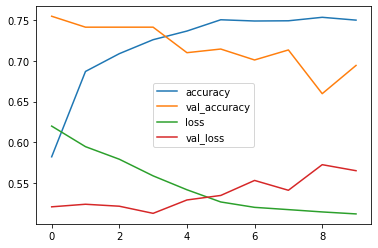

In [469]:
# Plot accuracy
history_functional_df[['accuracy','val_accuracy', 'loss', 'val_loss']].plot()

- Hasilsecara visualisasi nampak loss yang baik karena sudah menuju angka 0 akan tetapi untuk akurasinya mengalami exploding pada epoch ke 4.

In [470]:
# Prediction model
y_pred_func = model_functional_concat.predict(x_test)
y_pred_func = np.where(y_pred_func> 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

33/33 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.91      0.65      0.76       785
         1.0       0.44      0.81      0.57       269

    accuracy                           0.69      1054
   macro avg       0.68      0.73      0.67      1054
weighted avg       0.79      0.69      0.71      1054



- Model mampu memprediksi dengan akurasi 69%. 
- Hasil cukup baik karena model dapat memprediksi cutomer itu tidak churn dan kenyatanaanya tidak churn sebesar 92%.Ini adalah nilai precission

# Model Improvement

## Sequential API Improve

### Model Definition

In [496]:
# Creat model sequential imporve
model_sequential2 = keras.models.Sequential()
model_sequential2.add(Dense(32, activation='relu', input_shape=(6,), 
                            kernel_initializer=tf.keras.initializers.RandomNormal(),
                            kernel_regularizer='l2'))
model_sequential2.add(Dense(18, activation='relu'))
model_sequential2.add(Dense(9, activation='sigmoid'))
model_sequential2.add(Dense(1, activation='sigmoid'))

model_sequential2.compile(loss='binary_crossentropy',
                         optimizer='nadam',
                         metrics=['accuracy'])

model_sequential2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 32)                224       
                                                                 
 dense_90 (Dense)            (None, 18)                594       
                                                                 
 dense_91 (Dense)            (None, 9)                 171       
                                                                 
 dense_92 (Dense)            (None, 1)                 10        
                                                                 
Total params: 999
Trainable params: 999
Non-trainable params: 0
_________________________________________________________________


- Disini diberikan dilakukan improve berupa penggantian optimizer dan penambahan initializer dan regulazer.
- Digunakan `nadam` karena algoritma ini yang paling stabil nilai akurasinya daripada yang lain.
- RandomNormal digunakan untuk menghasilkan tensor dengan distribusi normal

### Model Training

In [500]:
%%time
history_seq2 = model_sequential2.fit(train_pipe, epochs=200,
                                   validation_data=val_pipe)

Epoch 1/200
45/45 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7616 - val_loss: 0.5935 - val_accuracy: 0.6607
Epoch 2/200
45/45 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7549 - val_loss: 0.5982 - val_accuracy: 0.6529
Epoch 3/200
45/45 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7577 - val_loss: 0.5599 - val_accuracy: 0.6830
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 0.4979 - accuracy: 0.7581 - val_loss: 0.5870 - val_accuracy: 0.6674
Epoch 5/200
45/45 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.7564 - val_loss: 0.5554 - val_accuracy: 0.6942
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 0.4932 - accuracy: 0.7623 - val_loss: 0.5799 - val_accuracy: 0.6708
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7590 - val_loss: 0.6344 - val_accuracy: 0.6295
Epoch 8/200
4

### Model Evaluation

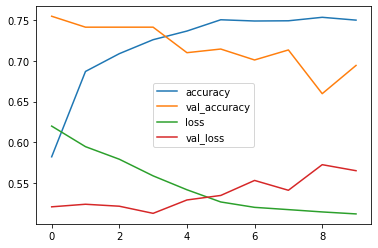

In [501]:
# Plot accuracy
history_functional_df[['accuracy','val_accuracy', 'loss', 'val_loss']].plot()

In [502]:
y_pred_seq2 = model_sequential2.predict(x_test)
y_pred_seq2 = np.where(y_pred_seq2 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq2))

33/33 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79       785
         1.0       0.47      0.78      0.59       269

    accuracy                           0.72      1054
   macro avg       0.69      0.74      0.69      1054
weighted avg       0.79      0.72      0.74      1054



- Disini setelah melakukan improve didapatkan kenaikan nilai accuracy sebesar 74%. ini mengalami kenaikan dari baseline.
- Dikarenakan digunakan epoch sebanyak 200. sehingga model cukup terlatih untuk memprediksi model.

# Functional API Improve

### Model Definition

In [475]:
# create functional API improve
input_layer = Input(shape=(6,))
hidden1_layer = Dense(64, activation='relu')(input_layer)
hidden2_layer = Dense(32, activation = 'relu')(hidden1_layer)
hidden3_layer = Dense(18, activation ='relu')(hidden2_layer)
hidden4_layer = Dense(9, activation='relu')(hidden3_layer)

concat_layer = concatenate([input_layer, hidden4_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_func_2 = Model(inputs= input_layer, outputs = output_layer)
model_func_2.compile(loss ='binary_crossentropy',
                                optimizer='nadam', metrics = ['accuracy'])

model_func_2.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_84 (Dense)               (None, 64)           448         ['input_9[0][0]']                
                                                                                                  
 dense_85 (Dense)               (None, 32)           2080        ['dense_84[0][0]']               
                                                                                                  
 dense_86 (Dense)               (None, 18)           594         ['dense_85[0][0]']               
                                                                                            

### Model Training

In [476]:
# fit with pipe line tensorflow
%%time
history_func_2 = model_func_2.fit(train_pipe, epochs=400,
                                   validation_data=(x_val, y_val))

Epoch 1/400
45/45 [==============================] - 1s 7ms/step - loss: 0.6290 - accuracy: 0.6263 - val_loss: 0.5134 - val_accuracy: 0.7444
Epoch 2/400
45/45 [==============================] - 0s 4ms/step - loss: 0.5879 - accuracy: 0.7213 - val_loss: 0.5216 - val_accuracy: 0.7455
Epoch 3/400
45/45 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.7388 - val_loss: 0.5412 - val_accuracy: 0.7121
Epoch 4/400
45/45 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.7456 - val_loss: 0.5429 - val_accuracy: 0.7098
Epoch 5/400
45/45 [==============================] - 0s 4ms/step - loss: 0.5191 - accuracy: 0.7450 - val_loss: 0.5161 - val_accuracy: 0.7288
Epoch 6/400
45/45 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.7469 - val_loss: 0.5690 - val_accuracy: 0.6752
Epoch 7/400
45/45 [==============================] - 0s 3ms/step - loss: 0.5130 - accuracy: 0.7520 - val_loss: 0.5651 - val_accuracy: 0.6886
Epoch 8/400
4

### Model Evaluation

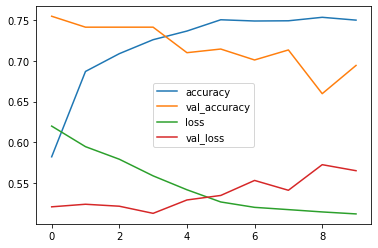

In [477]:
# Plot accuracy
history_functional_df[['accuracy','val_accuracy', 'loss', 'val_loss']].plot()

In [478]:
# predict with improve functional
y_pred_func2 = model_func_2.predict(x_test)
y_pred_func2 = np.where(y_pred_func2 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func2))

33/33 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77       785
         1.0       0.46      0.81      0.58       269

    accuracy                           0.70      1054
   macro avg       0.68      0.74      0.68      1054
weighted avg       0.79      0.70      0.72      1054



- Setelah melakukam improvement dengan penambahan epoch agar model dapat melatih lebih banyak lagi. Didapatkan peningkatan hasil accuracy. Accuracy yang dihasilkan dari epoch sebanyak 400 adalah sebesar 

# Hasil Model

In [479]:
# display classification repott for sequential and functional
print('=========Sequential============')
print(f'Sebelum Improvment: ')
print(classification_report(y_test, y_pred_seq))
print(f'Setelah Improvment: ')
print(classification_report(y_test, y_pred_seq2))

print('\n')
print('=============Sequential===============')
print(f'Sebelum Improvment: ')
print(classification_report(y_test, y_pred_func))
print(f'Setelah Improvment: ')
print(classification_report(y_test, y_pred_func2))

=========Sequential============
Sebelum Improvment: 
              precision    recall  f1-score   support

         0.0       0.89      0.70      0.78       785
         1.0       0.46      0.76      0.58       269

    accuracy                           0.71      1054
   macro avg       0.68      0.73      0.68      1054
weighted avg       0.78      0.71      0.73      1054

Setelah Improvment: 
              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71       785
         1.0       0.41      0.89      0.57       269

    accuracy                           0.65      1054
   macro avg       0.68      0.73      0.64      1054
weighted avg       0.81      0.65      0.67      1054



=============Sequential===============
Sebelum Improvment: 
              precision    recall  f1-score   support

         0.0       0.91      0.65      0.76       785
         1.0       0.44      0.81      0.57       269

    accuracy                           0.69   

---------------------------
**ANALISIS**
---------------------------

- Menurut saya pribadi churn adalah pelanggan yang memutus kontrak dengan perusahaan. Sehingga lebih penting bagi kita untuk men treatmen pelanggan yang terpredict tidak churn. Sehingga model yang baik berdasarkan kasus ini adalah model yang memiliki precision dan recall untuk nilai 0 tinggi. Karena lebih baik memprediksi bahwa pelanggan itu tidak churn dan memang kenyatannya tidak churn daripada harus memprediksi pelanggan itu churn dan aslinya dia tidak churn.

- Sehingga model sequential improve adalah model yang terbaik dengan keterangan:

precision yang mana dari 785 customer yang tidak churn mampu di prediksi tidak churn oleh model dengan tingkat keberhasilan 90%. Dan 10 persen salah prediksi kalo customer churn padahal tidak churn.
recall yang mana dari 269 customer terprediksi benar 73% bahwa benar tidak churn dan 27% seharusnya churn kita anggap sebagai tidak churn.

# Model Saving

In [480]:
# save pipeline
with open ('final_pipeline.pkl', 'wb') as file_1:
  joblib.dump(final_pipeline, file_1)

In [481]:
# display sumary best model
model_sequential2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 32)                224       
                                                                 
 dense_81 (Dense)            (None, 18)                594       
                                                                 
 dense_82 (Dense)            (None, 9)                 171       
                                                                 
 dense_83 (Dense)            (None, 1)                 10        
                                                                 
Total params: 999
Trainable params: 999
Non-trainable params: 0
_________________________________________________________________


In [482]:
# Freeze
model_sequential2.trainable = False
model_sequential2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 32)                224       
                                                                 
 dense_81 (Dense)            (None, 18)                594       
                                                                 
 dense_82 (Dense)            (None, 9)                 171       
                                                                 
 dense_83 (Dense)            (None, 1)                 10        
                                                                 
Total params: 999
Trainable params: 0
Non-trainable params: 999
_________________________________________________________________


In [503]:
# saving best model
model_sequential2.save('telco_model')

# Model Inference

In [504]:
# load model
with open('final_pipeline.pkl','rb') as file_1:
  model_pipeline = joblib.load(file_1)

model_ann = load_model('telco_model')


In [485]:
# Display Inference
df_inf 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,No,12,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.30,1094.50,Yes
1,Male,0,Yes,Yes,7,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,89.75,608.80,Yes
2,Female,0,Yes,No,4,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.05,129.60,No
3,Female,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.00,1849.20,No
4,Male,0,No,No,9,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,70.05,657.50,No
5,Female,0,Yes,Yes,51,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,Yes,Electronic check,90.15,4554.85,No
6,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.50,69.50,Yes
7,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.70,73.05,No
8,Male,1,Yes,No,67,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),60.95,4119.40,No
9,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Two year,Yes,Electronic check,84.80,6152.40,No


In [486]:
# selection feature in inference
df_inf.drop(['MonthlyCharges', 'SeniorCitizen', 'DeviceProtection','Dependents',
              'PaperlessBilling','Partner','PaymentMethod','InternetService','MultipleLines',
              'StreamingTV', 'StreamingMovies','gender', 'PhoneService'], 
             axis = 1)

,tenure,OnlineSecurity,OnlineBackup,TechSupport,Contract,TotalCharges,Churn
0,12,No,Yes,No,Month-to-month,1094.50,Yes
1,7,No,Yes,Yes,Month-to-month,608.80,Yes
2,4,Yes,No,No,Month-to-month,129.60,No
3,72,No internet service,No internet service,No internet service,Two year,1849.20,No
4,9,No,No,No,Month-to-month,657.50,No
5,51,No,No,No,One year,4554.85,No
6,1,No,No,No,Month-to-month,69.50,Yes
7,4,No internet service,No internet service,No internet service,Month-to-month,73.05,No
8,67,Yes,Yes,Yes,One year,4119.40,No
9,71,No,Yes,Yes,Two year,6152.40,No


In [487]:
# num and cat in inference
num_columns = df_inf.select_dtypes(include = np.number).columns.tolist()
cat_columns = df_inf.select_dtypes(include=['object']).columns.tolist()

print(num_columns)
print(cat_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [488]:
# Pipe line In inference
num_pipe_inf = make_pipeline(MinMaxScaler())

cat_pipe_inf = make_pipeline(OrdinalEncoder())

pipe_inf = ColumnTransformer([
    ('num_inf', num_pipe_inf, num_columns),
    ('cat_inf', cat_pipe_inf, cat_columns)
])

In [489]:
# Transforn inference
df_inf_transform = pipe_inf.fit_transform(df_inf)
df_inf_transform

array([[1.00000000e+00, 1.54929577e-01, 8.07318468e-01, 1.30389706e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 8.45070423e-02, 7.89594054e-01, 6.86040669e-02,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        0.00000000e+00, 2.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 4.22535211e-02, 9.54831332e-02, 7.64528912e-03,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0000

In [490]:
# display inference final
df_inf = pd.DataFrame(df_inf_transform, columns=[num_columns + cat_columns])
df_inf_final = df_inf[['tenure','TotalCharges','OnlineSecurity','OnlineBackup','TechSupport','Contract']]

In [491]:
# Display data inference
df_inf_final

,tenure,TotalCharges,OnlineSecurity,OnlineBackup,TechSupport,Contract
0,0.154930,0.130390,0.0,2.0,0.0,0.0
1,0.084507,0.068604,0.0,2.0,2.0,0.0
2,0.042254,0.007645,2.0,0.0,0.0,0.0
3,1.000000,0.226395,1.0,1.0,1.0,2.0
4,0.112676,0.074799,0.0,0.0,0.0,0.0
5,0.704225,0.570579,0.0,0.0,0.0,1.0
6,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.042254,0.000452,1.0,1.0,1.0,0.0
8,0.929577,0.515186,2.0,2.0,2.0,1.0
9,0.985915,0.773802,0.0,2.0,2.0,2.0


In [505]:
# Predict inf with model ann
y_pred_inf = model_ann.predict(df_inf_final)
y_pred_inf = np.where(y_pred_inf >= 0.5,1,0)
y_pred_inf = pd.DataFrame(y_pred_inf)
y_pred_inf

1/1 [==============================] - 0s 57ms/step


,0
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,0
8,0
9,0


In [506]:
# concat predict
pred_inf = pd.concat([df_inf['Churn'], y_pred_inf], axis =1)
pred_inf

,"(Churn,)",0
0,1.0,1
1,1.0,1
2,0.0,1
3,0.0,0
4,0.0,1
5,0.0,1
6,1.0,1
7,0.0,0
8,0.0,0
9,0.0,0


In [507]:
# Classification report predict
print(classification_report(df_inf['Churn'], y_pred_inf))

              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77        15
         1.0       0.44      0.80      0.57         5

    accuracy                           0.70        20
   macro avg       0.68      0.73      0.67        20
weighted avg       0.79      0.70      0.72        20



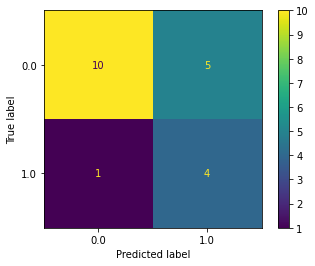

In [508]:
#Confusion Matric predict
ConfusionMatrixDisplay.from_predictions(df_inf['Churn'], y_pred_inf)
plt.show()

# Kesimpulan

Dataset ini berisikan tentang data para customer pada perusahaan bernama Telco. Dimana pada data ini berisikan banyak sekali feature yang menentukan customer tersebut churn atau tidak. Pada data set ini telah diketahui tidak banyak pelanggan yang churn, sehingga data mengalami imbalance hampir 2 kali nya. Disini terdapat total `7043 jumlah customer` dengan berbagai macam kategori. Dilakukanlah explorasi yang mengasilkan pengguna phone service ternyata lebih tinggi di banding yang tidak menggunakannya. Dan untuk layanan internet menggunakan fiber optic lebih banyak diminati customer dibanding DSL. Serta penggunakan jasa online security ternyata kurang diminati oleh customer karena dari sejumlah data hanya 28% yang menggunakannya. Ternyata mereka yang streaming tv sama jumlahnya dengan mereka yang streamiing movie. Dengan kata lain customer yang menonton movie tidak bisa dikatakan lebih baik dari yang menonton tv. Untuk online backup banyak dari para customer seimbang antara yang menggunakan dan tidak, hanya sedikit lebih banyak yang tidak menggunakan online backup. Untuk perbandingan antara tenure total charger dan churn. Didapatkan hasil semakin lama customer itu bertahan maka total charges nya juga semakin tinggi sehingga lebih banyak customer yang memutus kontrak atau churn dengan perusahaan telfo ini.

Pada kasus ini saya berfokus customer akan melakukan churn atau tidak. Sehingga menurut saya pembuatan model kali ini harus di fokuskan pada customer yang terindikasi tidak churn. Dikarenakan dengan terindikasi tidak churn kita dapat menerapkan beberapa treatment kepada customer tersebut agar tetap bertahan pada perusahaan ini.

Model yang dibentuk adalah menggunakan sequential dan functional model. Dimana untuk baseline awalnya model ini dibentuk menggunakan 3 hidden layer yang membawa input feature sebanyak 6. Dengan activation yang sama yaitu `adam` dan epoch yang sama yaitu `10`. Pipeline digunakan untuk mendefinisikan batch, repeat dan shuffle pada train val dan test. batch yang digunakan untuk train adalah 500, untuk val 100 dan test 100. Sedangkan untuk repeat sebanyak 3 kali dan shufle sebanyak 50 kali.

Pada baseline hasil sequential memiliki accuracy 73% dengan precisiion 90% dan recall 71%. setelah di imporve menghasilkan accuracy '74' dan precission 89% dan recal 74%. Terlihat mengalami kenaikan.

Pada baseline frequential memiliki accuracy awal 69% dengan precision 92% dan recall 64%. Dan untuk hasil improve sebesar 70%, 91 untu precision dan recall 66%

improve disini dilakukan penambahan epoch agar model dapat lebih banyak lagi melatih data sehingga mampu memprediksi dengan benar.
Serta penggantian optimizer menjadi 'nadam' karena optimizer ini adalah yang paling stabil sehingga semakin banyak epoch jika nilai meningkan dengan adanya `nadam` konsistensi peningkatan model akan terjaga. Sehingga dapat mencegah vunishing dan exploding.

sehingga dipilihan model sequential yang telah di improve sebagai model terbaik yang nantinya akan diprediksi kepada model inference.

pada penerapan inferene didapatkan acurasi sebesar 70% dan precisio n 915 yang artinya prediksi mereka tidak churn tinggi. dan untuk recall 67%.

saran dari saya sebaiknya data diperbanyak lagi sehingga model mampu melatih lebih banyak data sehingga dapat memprediksi dengan baik. Ditambahlagi data imbalance. Model predict akan terbuat dengan baik.


